In [1]:
import pandas as pd
# this function generates an item bank, in case the user cannot provide one
from catsim.cat import generate_item_bank
# simulation package contains the Simulator and all abstract classes
from catsim.simulation import *
# initialization package contains different initial proficiency estimation strategies
from catsim.initialization import *
# selection package contains different item selection strategies
from catsim.selection import *
# estimation package contains different proficiency estimation methods
from catsim.estimation import *
# stopping package contains different stopping criteria for the CAT
from catsim.stopping import *
import catsim.plot as catplot
from catsim.irt import icc
from catsim.irt import detect_model


# this function generates an item bank, in case the user cannot provide one
from catsim.cat import generate_item_bank
# simulation package contains the Simulator and all abstract classes
from catsim.simulation import *
# initialization package contains different initial proficiency estimation strategies
from catsim.initialization import *
# selection package contains different item selection strategies
from catsim.selection import *
# estimation package contains different proficiency estimation methods
from catsim.estimation import *
# stopping package contains different stopping criteria for the CAT
from catsim.stopping import *
import catsim.plot as catplot
from catsim.irt import icc

import sys
import torch  
import gym
import numpy as np  
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
import gym
import random

from gym import Env, spaces
import time

from IPython import display
from random import randint
import statistics

C:\Users\patri\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# !pip install --upgrade Pandas

In [3]:
# !pip install --upgrade pip

In [4]:
alunos = pd.read_excel('C:/Users/patri/Desktop/Base_enem/enem.xlsx')
alunos

,MT1,MT2,MT3,MT4,MT5,MT6,MT7,MT8,MT9,MT10,...,ES1,ES2,ES3,ES4,ES5,IN1,IN2,IN3,IN4,IN5
0,True,False,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,True,False,False,True,False
1,False,False,True,True,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,False,False,False,True,True
2,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,NaN,NaN,NaN,NaN,NaN
3,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False
4,False,True,False,False,False,False,False,False,True,False,...,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,True,True,False,False,True,False,False,False,...,False,False,True,True,True,NaN,NaN,NaN,NaN,NaN
9996,True,False,False,True,False,False,False,False,True,True,...,NaN,NaN,NaN,NaN,NaN,False,False,True,True,False
9997,False,False,True,True,False,False,False,False,False,False,...,True,False,True,False,True,NaN,NaN,NaN,NaN,NaN
9998,True,False,True,True,True,False,False,False,True,False,...,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN


In [5]:
full_items = list(range(0, 9999))
full_items

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


aluno: 0
Theta Original:  2.757516679218262
Estimated proficiency, given answered items: 1.381888535
erro: 1.892352791165379
Estimated proficiency, given answered items: 2.0728328025000002
erro: 0.46879201103794776
Estimated proficiency, given answered items: 2.41830493625
erro: 0.11506460656756606
Estimated proficiency, given answered items: 2.5910410031250004
erro: 0.02771415073070853
Estimated proficiency, given answered items: 2.6774090365625005
erro: 0.006417234411863167
Estimated proficiency, given answered items: 2.7205930532812506
erro: 0.001363354152336339
Estimated proficiency, given answered items: 2.742185061640625
erro: 0.00023505849754690142
Estimated proficiency, given answered items: 3.10947043533739
erro: 0.12387144644636273
Estimated proficiency, given answered items: 2.951729657607881
erro: 0.03771868097496659
Estimated proficiency, given answered items: 2.9713013831558546
erro: 0.045703899637684134
Estimated proficiency, given answered items: 2.9877183979313737
erro

Estimated proficiency, given answered items: 2.969598342682429
erro: 0.00027002208674439246
Estimated proficiency, given answered items: 2.9717290004137444
erro: 0.00020453836712777055
Estimated proficiency, given answered items: 2.973074884444812
erro: 0.00016785293572752947
Estimated proficiency, given answered items: 2.97521559690195
erro: 0.00011696627056062419
Estimated proficiency, given answered items: 2.977684854573929
erro: 6.965299353036162e-05
Estimated proficiency, given answered items: 2.9789387272426584
erro: 5.029595663124432e-05
Estimated proficiency, given answered items: 2.9803412341827302
erro: 3.2369924247214015e-05
Estimated proficiency, given answered items: 2.9817384855480094
erro: 1.842303169453566e-05
Estimated proficiency, given answered items: 2.9825045259384146
erro: 1.2433843370734346e-05
Estimated proficiency, given answered items: 2.98351206698657
erro: 6.343469298957895e-06
Estimated proficiency, given answered items: 2.983876457711182
erro: 4.6407230965

Estimated proficiency, given answered items: 0.15987558182975428
erro: 2.123731068956622e-06
Estimated proficiency, given answered items: 0.15786483894429934
erro: 3.0629607323446786e-07
Estimated proficiency, given answered items: 0.16211619641695782
erro: 1.3674592033428725e-05
Estimated proficiency, given answered items: 0.16112857562655852
erro: 7.345706932331689e-06
Estimated proficiency, given answered items: 0.1604310215189195
erro: 4.051131800189636e-06
Estimated proficiency, given answered items: 0.15993097136809992
erro: 2.2882377140418267e-06
Estimated proficiency, given answered items: 0.15955261543095742
erro: 1.2867187738065887e-06
Estimated proficiency, given answered items: 0.15914044351173803
erro: 5.215213497733571e-07
Estimated proficiency, given answered items: 0.15891754202576913
erro: 2.4926340834244396e-07
Estimated proficiency, given answered items: 0.1587076832184629
erro: 8.375470859480083e-08
Estimated proficiency, given answered items: 0.15863477360680012
er

Estimated proficiency, given answered items: -0.6536239032386678
erro: 0.0033956223803402064
Estimated proficiency, given answered items: -0.658945258574301
erro: 0.004044110910100712
Estimated proficiency, given answered items: -0.6251403622904513
erro: 0.0008873504505009505
Estimated proficiency, given answered items: -0.5983700169307097
erro: 9.108823612666797e-06
Estimated proficiency, given answered items: -0.6022749579861881
erro: 4.79282589021254e-05
Estimated proficiency, given answered items: -0.6052275240808206
erro: 9.75272762901429e-05
Estimated proficiency, given answered items: -0.5950311840508327
erro: 1.0288063233826824e-07
Estimated proficiency, given answered items: -0.5971093202050818
erro: 3.0884057125033967e-06
Estimated proficiency, given answered items: -0.5978066061773245
erro: 6.025414714109844e-06
Estimated proficiency, given answered items: -0.5954953433241329
erro: 2.0566188443404795e-08
Estimated proficiency, given answered items: -0.5958030605315574
erro: 

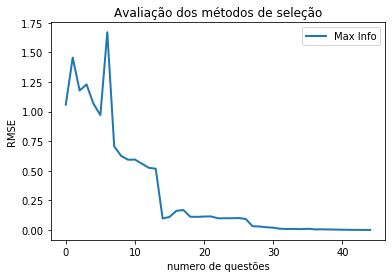

In [19]:
alunos = pd.read_excel('C:/Users/patri/Desktop/Base_enem/enem.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/Base_enem/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

mu = -4
sigma = 0
nq = 0

aluno_vet = list(range(0, 9999))

responses = []
administered_items = []
theta_est = []
erro_theta = []

initializer = RandomInitializer()
selector = MaxInfoSelector()
estimator = NumericalSearchEstimator()
est_theta = initializer.initialize()
full_items = list(range(0, 45))

mu = 0
sigma = 0
nq = 0
est_theta=0

result = np.reshape(list(range(0, 45)),(1,45))

for aluno in aluno_vet: 
    print('aluno:', aluno)
    respostas = alunos.iloc[aluno,0:45].tolist()
    ori_theta = estimator.estimate(items=items, administered_items=full_items, response_vector=respostas, est_theta=est_theta)
    #print('Theta Original: ',ori_theta)
    responses = []
    administered_items = []
    theta_est = []
    erro_theta = []
    for nq in range(0, 45):
        item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)

        correct = alunos.iloc[aluno,item_index]
        administered_items.append(item_index)
        responses.append(correct)

        est_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
        #print('Estimated proficiency, given answered items:', est_theta)
        theta_est.append(est_theta)

        erro = abs(ori_theta - est_theta)
        erro_2 = (ori_theta - est_theta)**2
        #print('erro:', erro_2)
        erro_theta.append(erro_2)

        nq = nq+1
        #print('nq:', nq)

    erro_theta = np.reshape(erro_theta,(1,45))
    result = np.concatenate((result, erro_theta), axis=0)

    
# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean(result[1:,:],axis=0)), label='Max Info', linewidth=2)
#plt.plot(range(0, 45), result[2,], label='Aleatorio', linewidth=2)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção")

np.savetxt('Result_erro_MaxInfoSelector.txt',result)

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

In [ ]:
result = np.reshape(list(range(0, 45)),(1,45))

In [9]:
result

array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 3.00000000e+00,
        4.00000000e+00, 5.00000000e+00, 6.00000000e+00, 7.00000000e+00,
        8.00000000e+00, 9.00000000e+00, 1.00000000e+01, 1.10000000e+01,
        1.20000000e+01, 1.30000000e+01, 1.40000000e+01, 1.50000000e+01,
        1.60000000e+01, 1.70000000e+01, 1.80000000e+01, 1.90000000e+01,
        2.00000000e+01, 2.10000000e+01, 2.20000000e+01, 2.30000000e+01,
        2.40000000e+01, 2.50000000e+01, 2.60000000e+01, 2.70000000e+01,
        2.80000000e+01, 2.90000000e+01, 3.00000000e+01, 3.10000000e+01,
        3.20000000e+01, 3.30000000e+01, 3.40000000e+01, 3.50000000e+01,
        3.60000000e+01, 3.70000000e+01, 3.80000000e+01, 3.90000000e+01,
        4.00000000e+01, 4.10000000e+01, 4.20000000e+01, 4.30000000e+01,
        4.40000000e+01],
       [1.37562814e+00, 6.84683877e-01, 3.39211743e-01, 1.66475676e-01,
        8.01076427e-02, 3.69236259e-02, 1.53316176e-02, 3.51953756e-01,
        1.94212978e-01, 2.13784704e-01,

In [15]:
np.mean(result[1:,:],axis=0)

array([8.73483978e-01, 1.27076449e+00, 9.10466960e-01, 9.16541548e-01,
       6.70176876e-01, 6.29653609e-01, 9.68768916e-01, 4.87912461e-01,
       4.28614302e-01, 3.72476578e-01, 4.01205844e-01, 3.52616649e-01,
       2.49493501e-01, 2.71304765e-01, 7.28865835e-02, 8.15596060e-02,
       9.88092629e-02, 9.73310374e-02, 7.03159384e-02, 6.49152563e-02,
       6.54927796e-02, 5.93596898e-02, 6.17117232e-02, 6.54291553e-02,
       6.07692851e-02, 5.94715913e-02, 4.89361191e-02, 2.20556300e-02,
       1.68559712e-02, 1.44124688e-02, 1.18875111e-02, 6.44032426e-03,
       5.20650994e-03, 5.17922173e-03, 4.41333205e-03, 5.05488494e-03,
       2.72846423e-03, 2.34000658e-03, 2.03178134e-03, 1.46609297e-03,
       8.32433794e-04, 4.47516165e-04, 1.40308700e-04, 9.77539936e-06,
       2.83470053e-12])

In [ ]:
result

In [ ]:
erro_theta

In [ ]:
statistics.pstdev(ori_theta, est_theta)

In [ ]:
x = np.array(list(range(0, 45)))
x.shape

x = np.reshape(x,(9,5))
x

In [ ]:
erro_theta1 = np.reshape(erro_theta,(1,45))
result1 = np.reshape(list(range(0, 45)),(1,45))

In [ ]:
result = np.concatenate((result1, erro_theta1), axis=0)

In [ ]:
result

In [ ]:
result[1,]

In [ ]:
statistics.pstdev(ori_theta, est_theta)

In [ ]:
theta_est